## C# vs Python programmers in 2018

### Overall distribution

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data2018 = pd.read_csv('data/2018/survey_results_public.csv', low_memory=False)

In [4]:
for language in ['C#', 'Python']:
    data2018[language] = data2018['LanguageWorkedWith'].map(lambda c: language in str(c).split(';'))

In [5]:
def csharp_or_python(col):
    if col['C#'] and col['Python']:
        return 'Both'
    elif col['C#']:
        return 'C#'
    elif col['Python']:
        return 'Python'
    return 'Neither'

In [6]:
combined_column = 'csharp_or_python'

In [7]:
data2018[combined_column] = data2018.apply(lambda col: csharp_or_python(col), axis=1)

In [8]:
data2018.loc[:5, ['C#', 'Python', combined_column]]

,C#,Python,csharp_or_python
0,False,True,Python
1,False,True,Python
2,False,False,Neither
3,True,False,C#
4,False,False,Neither
5,False,True,Python


In [9]:
group_count = data2018.groupby(combined_column).size()
group_count

csharp_or_python
Both        8722
C#         18232
Neither    50264
Python     21637
dtype: int64

In [10]:
group_count.sort_values

<bound method Series.sort_values of csharp_or_python
Both        8722
C#         18232
Neither    50264
Python     21637
dtype: int64>

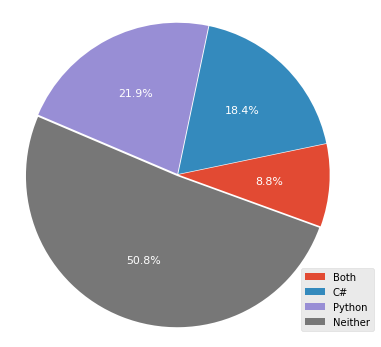

In [11]:
plt.style.use('ggplot')

fig, ax = plt.subplots(1, figsize=(6, 6))
wedges, texts, autotexts = ax.pie(group_count.sort_values(), startangle=-20, explode=(0.005,0.005,0.005,0.01),
       textprops=dict(color='white'), autopct='%1.1f%%')

plt.setp(autotexts, size=11, weight='normal')
ax.axis('equal')  
plt.legend(group_count.sort_values().index, loc='lower right',
          bbox_to_anchor=(1.1, 0, 0, 0)
          )
plt.show()

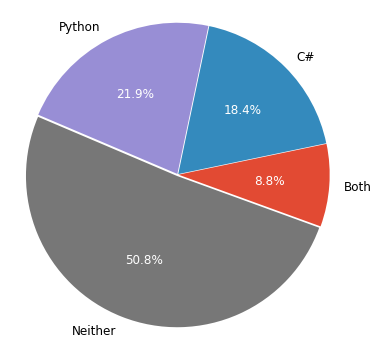

In [12]:
plt.style.use('ggplot')

fig, ax = plt.subplots(1, figsize=(6, 6))
wedges, texts, autotexts = ax.pie(group_count.sort_values(), startangle=-20, explode=(0.005,0.005,0.005,0.01),
       textprops=dict(color='black', fontsize='12'), autopct='%1.1f%%', labels = group_count.sort_values().index)

plt.setp(autotexts, size=12, weight='normal', color='white')
ax.axis('equal')  
plt.show()

### Health

In [13]:
data2018.loc[:, 'Exercise'].value_counts(normalize=True).index

Index(['I don't typically exercise', '1 - 2 times per week',
       '3 - 4 times per week', 'Daily or almost every day'],
      dtype='object')

In [14]:
# https://chrisalbon.com/python/data_visualization/matplotlib_grouped_bar_plot/

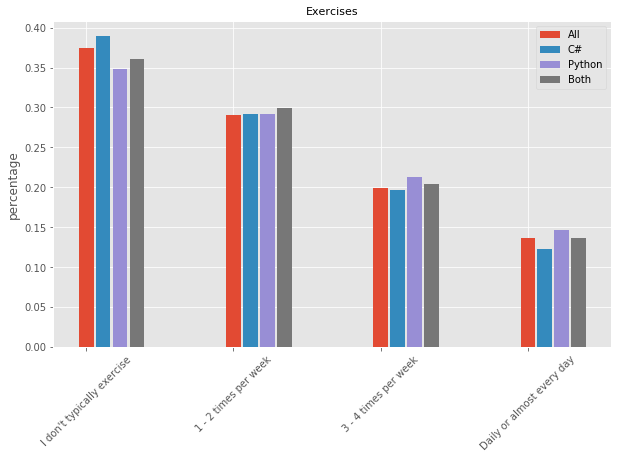

In [32]:
fig, ax = plt.subplots(1, figsize=(10, 6))

positions = [1,3,5,7] 
width = .2
padding = .03
ax.bar(positions, data2018['Exercise'].value_counts(normalize=True), width=width)
ax.bar([p+width+padding for p in positions], 
       data2018.loc[data2018[combined_column] == 'C#', 'Exercise'].value_counts(normalize=True), width=width)
ax.bar([p+2*width+2*padding for p in positions],
       data2018.loc[data2018[combined_column] == 'Python', 'Exercise'].value_counts(normalize=True), 
       width=width, label='foo')
ax.bar([p+3*width+3*padding for p in positions],
       data2018.loc[data2018[combined_column] == 'Both', 'Exercise'].value_counts(normalize=True), 
       width=width, label='foo')

ax.set_ylabel('percentage')
ax.set_xticks([1,3,5,7])
ax.set_xticklabels(data2018.loc[:, 'Exercise'].value_counts(normalize=True).index,
                  rotation=45)
plt.title('Exercises', fontsize=11)
plt.legend(['All', 'C#', 'Python', 'Both'])
plt.show()

### Bootstrap sampling

In [16]:
distribution = data2018['Exercise']
distribution.value_counts(normalize=True)

I don't typically exercise    0.374369
1 - 2 times per week          0.290287
3 - 4 times per week          0.198563
Daily or almost every day     0.136781
Name: Exercise, dtype: float64

In [17]:
np.random.choice(distribution, 10)

array(["I don't typically exercise", nan, '1 - 2 times per week',
       "I don't typically exercise", nan, nan,
       "I don't typically exercise", "I don't typically exercise",
       '3 - 4 times per week', '1 - 2 times per week'], dtype=object)

#### Python

In [18]:
# Confidence intervall for python programmers
generated_distributions = [np.random.choice(distribution, sum(data2018[combined_column] == 'Python')) for r in range(1000)]

In [19]:
distribution_percentages = [pd.Series(generated_distributions[d]).value_counts(normalize=True).values for d in range(1000)]

In [33]:
percentiles = np.percentile(distribution_percentages, [97.5, 2.5], axis=0)
percentiles

array([[0.38190531, 0.29755963, 0.20477369, 0.14191694],
       [0.36680748, 0.28378152, 0.19263552, 0.1318467 ]])

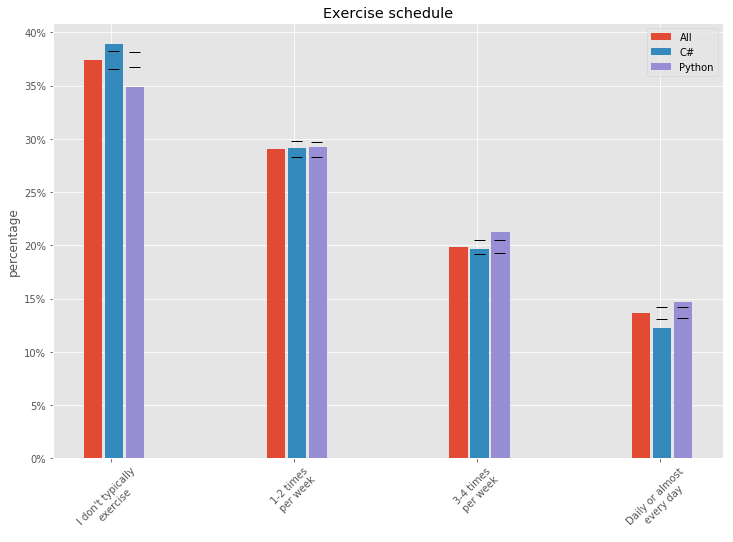

In [115]:
import locale
fig, ax = plt.subplots(1, figsize=(12, 8))

positions = [1,3,5,7] 
width = .2
padding = .03
ax.bar(positions, data2018['Exercise'].value_counts(normalize=True), width=width)
ax.bar([p+width+padding for p in positions], 
       data2018.loc[data2018[combined_column] == 'C#', 'Exercise'].value_counts(normalize=True), width=width)
ax.bar([p+2*width+2*padding for p in positions],
       data2018.loc[data2018[combined_column] == 'Python', 'Exercise'].value_counts(normalize=True), 
       width=width)

ax.set_ylabel('percentage')
ax.set_xticks([p+width for p in positions],)
ax.set_xticklabels(['I don\'t typically\nexercise', '1-2 times\nper week','3-4 times\nper week','Daily or almost\nevery day'],
                  rotation=45)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : locale.format_string("%d%%", x*100)))
plt.title('Exercise schedule')
plt.legend(['All', 'C#', 'Python'])

thickness = .06
number_of_samplings = 1000

# Do bootstrap sampling and show confidence intervalls
for lang, i in zip(['C#', 'Python'], [1,2]):
    generated_distributions = [np.random.choice(distribution, sum(data2018[combined_column] == lang)) 
                               for r in range(number_of_samplings)]
    distribution_percentages = [pd.Series(generated_distributions[r]).value_counts(normalize=True).values 
                                for r in range(number_of_samplings)]
    percentiles = np.percentile(distribution_percentages, [97.5, 2.5], axis=0)

    for j in range(4):
        offset = i*width+i*.025
        plt.hlines(percentiles[0, j], positions[j]-thickness+offset, positions[j]+thickness+offset, 
                   color='black', linewidth=1)
        plt.hlines(percentiles[1, j], positions[j]-thickness+offset, positions[j]+thickness+offset, 
                   color='black', linewidth=1)
plt.show()